In [4]:
%load_ext autoreload
%autoreload
import numpy as np
from scipy import signal
from scipy import misc
from scipy.signal import convolve2d as conv2
import scipy as sc
from skimage import color, data, restoration
import matplotlib.pyplot as plt
import lensless_utils as lensless
import copy
from PIL import Image
import requests
from IPython import display
from IPython.core.display import display as disp, HTML
from io import BytesIO

#from accelerate_fft import fft2
#from accelerate_fft import ifft2
import accelerate_fft as fft_a
from numpy.fft import fft2
from numpy.fft import ifft2
from numpy.fft import fftshift
from numpy.fft import ifftshift

# Fetch test image
response = requests.get("https://nickantipa.com/antipa_files/cameraman.tif")
img = np.array(Image.open(BytesIO(response.content)))
img_dims = np.shape(img)
img = np.array(Image.fromarray(img).resize((img_dims[0]*2,img_dims[1]*2)))
img_dims = np.shape(img)

# Generate FIR blur kernel
kernel = np.zeros((np.shape(img)[0]//2, np.shape(img)[1]//2))
kernel = np.random.rand(np.shape(img)[0]//2, np.shape(img)[1]//2)>.99;
#kernel_raw = np.array(Image.open("/Users/nick.antipa/Documents/personal_webpage_html/antipa_files/hsvideo_code_with_data/hsvideo_public_data/PSF/psf_averaged_2018-12-5.tif"))
kernel_raw = np.array(Image.open("/Volumes/Backup/nick.antipa/Documents/Diffusers/Lensless/Lenslets/PCO_norland_random/8-15-2018/RGB_LED.tif"))
#kernel_raw = np.array(Image.open("/Users/nick.antipa/Desktop/Desktop clean/MATLAB/caustics.tif"))
kernel_size = np.shape(kernel_raw)

meas_raw = np.array(Image.open("/Users/nick.antipa/Documents/developer/high-speed-video-recon/code/DiffuserCam/data/input/emrah.png"))
meas_raw = np.array(Image.open("/Volumes/Backup/nick.antipa/Documents/Diffusers/Lensless/Lenslets/PCO_norland_random/8-15-2018/card.tif"))

man_crop = 432;
rman_crop = 600;
ke = 0;
roffset = 50
c_min = (kernel_size[1] - kernel_size[0])//2 + man_crop
c_max = (kernel_size[1] + kernel_size[0])//2 - man_crop

img_dims = [324*2, 240*2]

kernel_crop = kernel_raw[rman_crop+roffset+ke:-(rman_crop-roffset+ke), c_min+ke:c_max-ke,1];

kernel = np.array(Image.fromarray(kernel_crop).resize((img_dims[0]//2,img_dims[1]//2)))

meas_crop = meas_raw[rman_crop:-rman_crop, c_min:c_max,1]
meas = np.array(Image.fromarray(meas_crop).resize((img_dims[0]//2,img_dims[1]//2)))
meas = meas/np.max(meas)
print(np.shape(kernel_crop))
print(np.shape(meas_crop))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


SSLError: HTTPSConnectionPool(host='nickantipa.com', port=443): Max retries exceeded with url: /antipa_files/cameraman.tif (Caused by SSLError(SSLCertVerificationError("hostname 'nickantipa.com' doesn't match either of '*.github.io', 'github.io', '*.github.com', 'github.com', 'www.github.com', '*.githubusercontent.com', 'githubusercontent.com'")))

In [2]:
np.shape(meas)

NameError: name 'meas' is not defined

In [3]:
man_crop = 432;
rman_crop = 600;

focus = [];
for ke in [-10]:
    print(ke)
    #ke = -5;
    roffset = 50
    c_min = (kernel_size[1] - kernel_size[0])//2 + man_crop
    c_max = (kernel_size[1] + kernel_size[0])//2 - man_crop

    img_dims = [324*2, 240*2]

    kernel_crop = kernel_raw[rman_crop+roffset+ke:-(rman_crop-roffset+ke), c_min+ke:c_max-ke,1];

    kernel = np.array(Image.fromarray(kernel_crop).resize((img_dims[0]//2,img_dims[1]//2)))

    #meas_crop = meas_raw[rman_crop:-rman_crop, c_min:c_max]
    #meas = np.array(Image.fromarray(meas_crop).resize((img_dims[0]//2,img_dims[1]//2)))
    #meas = meas/np.max(meas)



    plt.imshow(kernel)
    psf = copy.deepcopy(kernel)
    psf = psf/np.sum(psf)

    # Our forward model is then going to be 
    H = F(ifftshift(pad(psf)))
    H_star = np.conj(H)

    A = lambda x: np.real(crop(Fh(F(x)*H)))
    Ah = lambda y: np.real(Fh( H_star * F(pad(y) )))

    # Fista
    fig = plt.figure()
    t_k = 1
    x_k = np.zeros((2*M, 2*N))
    z_k = np.zeros((2*M, 2*N))
    y_k = np.zeros((2*M, 2*N))
    mu = 1
    n_iters = 1000
    tau_tv = 1e-5
    for k in range(n_iters):
        t_kp = (1+np.sqrt(1+4*t_k**2))/2;
        beta = (t_k-1)/t_kp;

        z_k = y_k - mu*Ah(A(y_k) - meas)
        x_kp = 0.5*tv2d_aniso_haar(z_k, tau_tv) + 0.5*np.maximum(z_k,0)
        y_k = x_kp + beta*(x_kp - x_k)

        x_k = x_kp
        t_k = t_kp

        if k%200 == 0:
            plt.imshow(crop(y_k),cmap='gray')
            drawnow(fig)
    focus.append(y_k)
    #x_fista = y_k 



-10


NameError: name 'kernel_size' is not defined

In [4]:
t = range(-50,50,5)
t[10]

0

In [5]:
range(-5,5)[6]

1

In [6]:
fig = plt.figure()
t = range(-30,30)
print(np.shape(t))

for ke in [32]:
    plt.imshow(crop(focus[ke]),vmax=2,cmap='gray')
    drawnow(fig)

(60,)


NameError: name 'crop' is not defined

<Figure size 432x288 with 0 Axes>

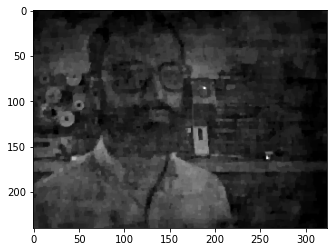

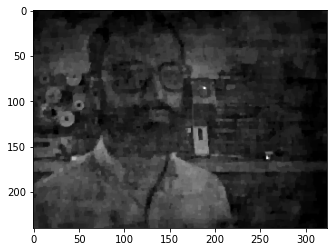

In [842]:
# Fista
fig = plt.figure()
t_k = 1
x_k = np.zeros((2*M, 2*N))
z_k = np.zeros((2*M, 2*N))
y_k = np.zeros((2*M, 2*N))
mu = 1
n_iters = 1000
tau_tv = 1e-5
for k in range(n_iters):
    t_kp = (1+np.sqrt(1+4*t_k**2))/2;
    beta = (t_k-1)/t_kp;
    
    z_k = y_k - mu*Ah(A(y_k) - meas)
    x_kp = 0.5*tv2d_aniso_haar(z_k, tau_tv) + 0.5*np.maximum(z_k,0)
    y_k = x_kp + beta*(x_kp - x_k)

    x_k = x_kp
    t_k = t_kp
    
    if k%200 == 0:
        plt.imshow(crop(y_k),cmap='gray')
        drawnow(fig)

x_fista = y_k 

In [759]:
import pyfftw
import time

In [5]:
# # Byte-aligned inputs are supposedly faster
# array_length = 2**22
# in_array = pyfftw.empty_aligned(array_length, dtype=np.float64)
# print("size:", round(in_array.nbytes / 1000 / 1000), "MB")

# # Required, even if we don't explicitly reference it again
# out_array = pyfftw.empty_aligned(array_length//2 + 1, dtype=np.complex128)

# fftw_object = pyfftw.FFTW(in_array,
#                           out_array,
#                           direction="FFTW_FORWARD",
#                           flags=("FFTW_ESTIMATE", ),
#                           threads=1)
# np_total = 0
# fftw_total = 0

# for i in range(10):
#     # Copy random data into our empty input array
#     in_array[:] = np.random.rand(array_length)

#     # Numpy
#     np_start = time.perf_counter()
#     np_output = np.fft.rfft(in_array)
#     np_total += time.perf_counter() - np_start

#     # FFTW
#     fftw_start = time.perf_counter()
#     fftw_output = fftw_object(in_array)
#     fftw_total += time.perf_counter() - fftw_start

#     # Show that Numpy and FFTW give the same answers
#     np.testing.assert_allclose(np_output, fftw_output)

#     # Remind ourselves that FFTW has modified and returned out_array
#     assert fftw_output is out_array

# print("np total:", np_total)
# print("fftw total:", fftw_total)

In [6]:
plt.imshow(kernel)

NameError: name 'kernel' is not defined

In [7]:
fft_a.set_nthreads(10)

1

In [763]:
test = np.random.rand(2,2)
a = np.fft.ifft2(np.fft.fft2(test))
b = ifft2(fft2(test))/4

print(a)
print(b)

[[0.84677296+0.j 0.25247008+0.j]
 [0.39502982+0.j 0.33374258+0.j]]
[[0.21169324+0.j 0.06311752+0.j]
 [0.09875745+0.j 0.08343564+0.j]]


In [764]:
kernel_padded = lensless.pad_func(kernel,0.5)
kernel_spectrum = np.fft.fft2(np.fft.ifftshift(kernel_padded));
y = lensless.crop_func(lensless.fftconv(img, kernel_spectrum), np.shape(kernel)) + .001*np.random.randn(np.shape(img)[0]//2, np.shape(img)[1]//2)


ValueError: operands could not be broadcast together with shapes (480,648) (512,512) 

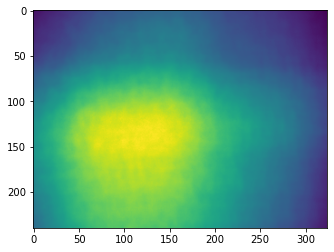

In [765]:
# It's shift invariant, right? So let's use FFT convolution to make it fast.

# Load kernel
psf = copy.deepcopy(kernel)
psf = psf/np.sum(psf)
kernel_padded = lensless.pad_func(psf,0.5)
kernel_spectrum = np.fft.fft2(np.fft.ifftshift(kernel_padded));

# Load ground truth image
scene = copy.deepcopy(img)
scene = scene/np.max(scene)

# Load measurement
#meas = lensless.crop_func(lensless.fftconv(scene, kernel_spectrum), np.shape(kernel)) + .001*np.random.randn(np.shape(img)[0]//2, np.shape(img)[1]//2)


# Compute problem size


plt.imshow(meas,vmax=1)



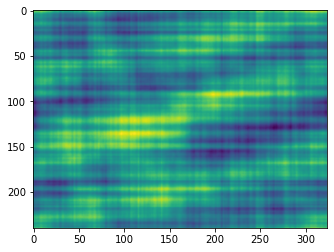

In [766]:
# Let's try a wiener filter
scene_wiener, _ = restoration.unsupervised_wiener(meas, psf,clip=0)
plt.imshow(scene_wiener)

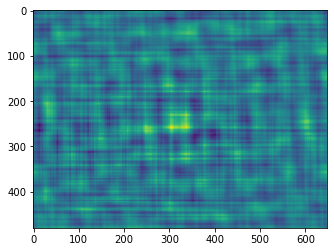

In [767]:
# This has to do with the enormous kernel size and the circular boundary conditions in FFTs.
psf_pad = lensless.pad_func(psf,0.5)
meas_pad = lensless.pad_func(meas, 0.5)
scene_wiener_pad, _ = restoration.unsupervised_wiener(meas_pad, psf_pad,clip=0)
plt.imshow(scene_wiener_pad)

# Hmmm....what's going on here?

In [768]:
def create_impulse(siz, shift):
    delta = np.zeros(siz)
    delta[siz[0]//2-shift[0], siz[1]//2-shift[1]] = 1
    return delta

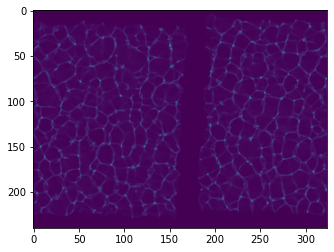

In [769]:
# Example showing input-output relationship and why this system is not invertible in freq. space
psf_shape = np.shape(psf)
M = psf_shape[0]
N = psf_shape[1]


hx = 150
hy = 0
delta_scene = create_impulse((M,N),(hy,hx))

meas_fft = lambda x:np.real(ifft2(fft2(ifftshift(psf)) * fft2(x)))
test = meas_fft(delta_scene)
plt.imshow(test,vmax = .0005)


(slice(120, 360, 1), slice(162, 486, 1))


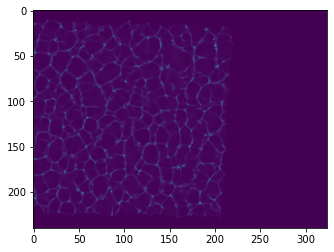

In [770]:
# This is obviously unphysical! The PSF does not wrap around! We can fix this with zero padding
psf_pad = lensless.pad_func(psf, 0.5)

hx = 100
hy = 0
delta_pad = create_impulse((2*M, 2*N), (hy, hx))


# Here is the proper convolution method using ffts
conv2_fft = lambda x:lensless.crop_frac(np.real(ifft2(fft2(ifftshift(psf_pad)) * fft2(x))), 0.5)

# Note: this is equivalent to using fftshift(fft2(ifftshift)*fft2(ifftshift)), but has fewer fftshifts ;)
test = conv2_fft(delta_pad)
plt.imshow(test,vmax = .0005)

# This has effectively computed the same thing as a linear convolution would return. Let's double check that



In [771]:
#test_linear = conv2(psf, delta_pad, 'same')

ValueError: operands could not be broadcast together with shapes (240,324) (256,256) 

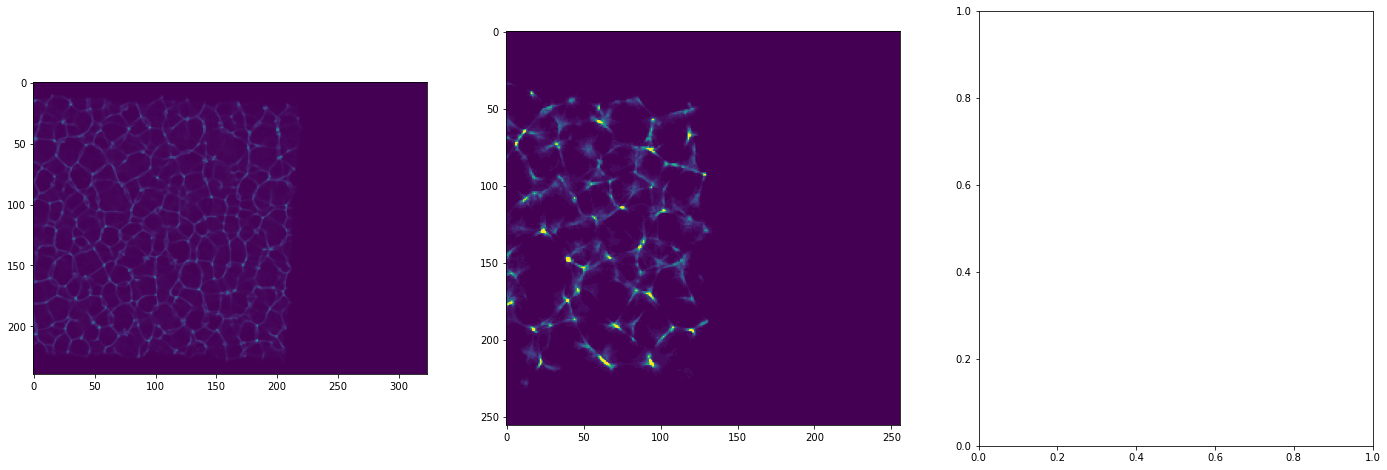

In [772]:
# Wow that was slow! This is why we want to use FFT convolution. Let's take a look nat how we did.
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(test, vmax=.0005)
ax[1].imshow(test_linear,vmax=.0005)

res = ax[2].imshow((np.roll(test,(1,1),(0,1)) - test_linear)/(test_linear+.0001),vmin=-.001,vmax=.001)
fig.colorbar(res,ax=ax[2])


The problem is, this is no longer division in frequency space! Our model can be written as $$b = \mbox{crop}\left[x * \mbox{pad}(h)\right] = \mbox{crop}\left[x*\bar{h}\right]$$

where $\mbox{pad}(h) := \bar{h}$. Let's take a look at each of these operators. $\mbox{crop}(\cdot)$ takes in an image, and removes the borders. This is a linear operation, but it is not a shift invariant operator! This is easy to verify as we'll show below. To test if this system is shift invariant, we will shift the input, then ask if we shift the output back by the same amount, do we recover the same value? 


In [773]:
shift_x = 150
shift_y = 0
delta_shift = create_impulse((2*N, 2*M), (shift_y,shift_x))
meas_shift = conv2_fft(delta_shift)
meas_unshift = lensless.crop_frac(np.roll(lensless.pad_func(meas_shift,0.5),(shift_y, shift_x),(0,1)),0.5)


fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(psf, vmax=.0005)
ax[1].imshow(meas_shift, vmax=.0005)
ax[2].imshow(meas_unshift,vmax=.0005)


ValueError: operands could not be broadcast together with shapes (480,648) (648,480) 

Clearly this is not a shift invariant system! If $$b(\xi - u_0) \neq Ax(u - u_0)$$ then it's not shift invariant, which means it cannot be modeled entirely in frequency space. This is why Wiener deconvolution fails with systems that have large point spread functions.



So it's not shift invariant, but it is linear. Let's solve the problem iteratively. We can do this using gradient descent. We can think of the scene we wish to recover as a vector, $\mathbf{x}$. A quick note on dimensions: we will think of the image as a vector, but we will not be reshaping it into a 1D vector when we implement these algorithms. The breakdown of how to solve these problems looks like this: 
1. Setup the optimization problem in terms of linear algebra
2. Factor the optical system matrix such that it can be computed using efficient operators
3. Derive the update equations in terms of these operators
4. Implement the iterative solver.

Let's see this in action. 

### Step 1: Setup the optimization problem in terms of linear algebra
So far we have expressed the forward model in signal processing terms $$b = \mbox{crop}\left[x * \mbox{pad}(h)\right]$$

This can be written in terms of FFT convolution

$$b = \mbox{crop}\left\{F^{-1}[F(x) \cdot F(S^{-1}\bar{h})]\right\}$$

where $F$ is the 2D Fast Fourier Transform (FFT),  $S$ is FFT shifting, and $\circ$ denotes the hadamard product (elementwise multiplication of two vectors). Here we think of $b$, $x$, and $h$ as 2D signals. For simplicity, we are treating these as discrete signals and assuming they are well approximated as such. 


An alternate way of expressing this problem is to use linear algebra. This is useful for connecting our problem to convex optimization and makes deriving gradients easy. Because each operation in our forward model is linear, we can equivalently write the forward model as $$\mathbf{b}=A\mathbf{x}.$$

Here, $\mathbf{x}$ contains the same values as $x$, but we are using bold to denote that this is a vector. You can think of this as a column-stacked 1D version of $x$. So if $x\in \mathbb{R}^{M\times N}$, then $\mathbf{x}\in \mathbb{R}^{MN\times 1}$. Equivalently, we can think of $\mathbf{x}$ as a vector that is indexed with two arguments, the row and column indices $m$ and $n$, respectively (there's no reason a vector space requires vectors to be 1D!). $A$ is the optical system matrix and it maps from object space to sensor space. Column $i$ of $A$, $\mathbf{a}_i$, is a vector which represents the sensor intensity distribution from scene point indexed by $i$. 

We can then find an estimate of the image by solving an optimization problem \begin{equation}\hat{\mathbf{x}}=\arg\min_x \frac{1}{2}\|A\mathbf{x} - \mathbf{b}\label{eq:1} \tag{1}\|_2^2\end{equation}

If we knew $A$ in its entirety, we could solve this either by direct matrix inversion, or iteratively. However, because we want to recover images with a reasonable number of pixels, $A$ is too large to handle explicitly (a 1 megapixel sensor would require $A$ to contain approximately 1 million 1 megapixel images!). To get around this problem, lensless cameras employ optical designs that lead to system matrices that can be efficently computed. In our case, we will use the convlutional nature of our camera to achieve this. What we'll do is use the linear algebra representation to analyze the problem and derive iterative updates, but when we implement it in code, we will use operators and functions that are more efficient than a large matrix multiply.

We're going to focus on solving this problem iteratively. We start by solving Eq. $\ref{eq:1}$ using gradient descent. This can be done using the update equations

\begin{equation}x^{k+1} \leftarrow x^k - \mu A^H(A\mathbf{x} - \mathbf{b}) \label{eq:gd_update}\tag{2}\end{equation}

where $A^H$ is the adjoint (conjugate-transpose) of $A$.

### Step 2: Factor the optical system matrix such that it can be computed using efficient operators. 
Since we introduced the forward model in terms of signal processing, we'll take each operator and think about what its equivalent matrix representation looks like. We can then use this to compute the above gradient. Since each operator in our forward model is linear, we'll denote each with a matrix. $P$ denotes zero padding, $C$ denotes cropping, and $H$ denotes 2D circular convolution with the padded PSF, $\bar{h}$. Hence we can write 
\begin{aligned}Ax &= CF^{-1}\left[FS^{-1}h\circ Fx)\right]\\& = CF^{-1}\mbox{diag}(\tilde{H})Fx\end{aligned} 

The operator $\circ$ is the hadamard product (elementwise multiplication between two vectors), which we can equivalently express as $x\circ y = \mbox{diag}(x)y$ where $\mbox{diag}(x)$ is a matrix with the elements of $x$ on the diagonal. 

Now it is easy to derive an expression for $A^H$ so that we can easily compute our gradient. Using a few simple properties, this is straightforward:

1. $(ABC)^H = C^HB^HA^H$
2. FFTs are unitary, so $F^H = F^{-1}$. 
3. The adjoint of cropping is zero padding, so $C^H = P$ where $P$ is zero padding
4. $diag(x)^H = diag(x^*)$ where $x^*$ is elementwise complex conjugation

This gives us an adjoint which is

$$\begin{aligned}A^H &= F^H \mbox{diag}\left(\tilde{H} \right)^HF^{-H}C^H\\ &= F^{-1}\mbox{diag}\left(\tilde{H}^* \right)FP \end{aligned}$$. 



In signal processing terms, we note that conjugation in frequency space is equivelent to mirroring in real space, so computing the adjoint of our system, $A^H$, is equivalent to zero padding followed by circular convolving with the mirrored PSF (this is circular correlation!).

### Step 3: Derive the update equations in terms of these operators

Now that we've got this expression for $A$, we can rewrite the gradient update \ref{eq:gd_update} in terms of our operators. We'll need a few properties to get this done:


$$\mathbf{x}^{k+1} \rightarrow x^k - \mu F^H \mbox{diag}\left(\tilde{H}^* \right)FP\left[CF^{H}\mbox{diag}\left(\tilde{H}\right)Fx^k - b\right]$$

In signal processing notation, this would be

$$x^{k+1} \rightarrow x^k - \mu \bar{h}\star \mbox{pad}\left[\mbox{crop}\left(\bar{h}\circledast x - b \right)\right]$$









The beauty of this is that we can implement each one of these linear operators with very efficient code

| matrix      | Numpy |
| ----------- | ----------- |
| $Fx$     | `fft.fft2(ifftshift(x))`     |
| $F^{-1}y$   | `fft.fftshift(fft.ifft2(y))`        |
| $\mbox{diag}(x) y$   | `x*y`    |
| crop($x$) | `x[M//4:5*M//4, N//4:5*M//4]`|
| pad($x$) | `pad(x,[(M//2,M//2), (N//2,N//2)],'constant')`|


In [774]:
# Let's make each of these operators into a function so we can easily write out the gradient

In [775]:
def F(x):
    return fft2(x)

In [776]:
def Fh(x):
    return ifft2(x)

In [790]:
def crop(x):
    M,N = x.shape
    rl = M//4
    ru = 3*np.ceil(M/4)
    cl = N//4
    cu = 4*np.ceil(N/4)
    return x[M//4:3*M//4, N//4:3*N//4]

In [791]:
def pad(x):
    M,N = x.shape    
    return np.pad(x,[(M//2,M//2), (N//2,N//2)],'constant')

In [792]:
kernel.shape[1]/2


162.0

In [793]:
print(np.shape(pad(kernel)))

(480, 648)


In [794]:
# Our forward model is then going to be 
H = F(ifftshift(pad(psf)))
H_star = np.conj(H)

A = lambda x: np.real(crop(Fh(F(x)*H)))
Ah = lambda y: np.real(Fh( H_star * F(pad(y) )))

### Let's check that our operators are adjoints!
The definition of an adjoint is $\left< Ax,y\right> = \left<x, A^Hy\right>$. We can check this easily by generating random images and verifying that this holds

In [795]:
x = np.random.rand(2*M, 2*N)
y = np.random.rand(M,N)

Ax_y = np.sum(A(x)*y)
x_Ahy = np.sum(x*Ah(y))
print('<A(x),y> =',Ax_y)
print('<x,Ah(y)>=',x_Ahy)

#Close enough for me! 
# The small difference comes from numerical precision issues and is not important.

<A(x),y> = 19465.558920765146
<x,Ah(y)>= 19465.55892076515


In [796]:
def drawnow(fig):
    display.clear_output(wait=True)
    display.display(fig)

In [797]:
%%time
for k in range(1000):
    test = ifft2(fft2(img+k))

CPU times: user 6.69 s, sys: 31.7 ms, total: 6.72 s
Wall time: 6.72 s


In [798]:
img.shape

(512, 512)

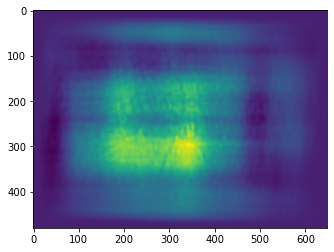

KeyboardInterrupt: 

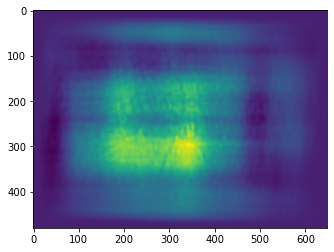

In [799]:
# Let's use this to iterate to a solution:
fig = plt.figure()

n_iters = 700
x_k = np.zeros((2*M, 2*N))
mu = 1
for k in range(n_iters):
    x_k = x_k - mu*Ah(A(x_k) - meas)
    if k%100 == 0:
        plt.imshow(x_k)
        drawnow(fig)
x_gd = x_k

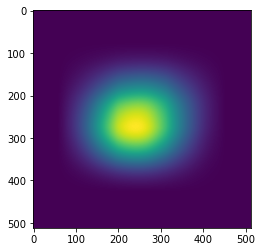

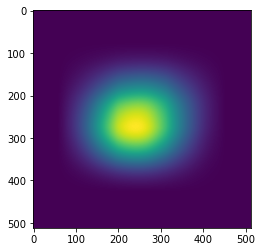

In [482]:
# Let's use this to iterate to a solution:
fig = plt.figure()

n_iters = 100
x_k = np.zeros((2*M, 2*N))
mu = 1
for k in range(n_iters):
    x_k = np.maximum(x_k - mu*Ah(A(x_k) - meas),0)
    if k%100 == 0:
        plt.imshow(x_k)
        drawnow(fig)
x_nonneg = x_k

In [483]:
def soft_thresh( x, tau):
    out = np.maximum(np.abs(x)- tau, 0)
    out = out*np.sign(x)
    return out 

def tv2d_aniso_haar(x,tau,plot=0): 
    #we average the sum of shrinkage function in each direction
    #first, we transform the image using wavelet like opeartions to LL and HL, low res image and details of one direction
    #we soft threshold this, then we do the same for the other direction. 
    D=2;  #dimensions
    gamma=1; #stepsize
    thresh=np.sqrt(2)*2*D*tau*gamma; #this is the threshold for the shrinkage function
    y=np.zeros((np.shape(x)[0],np.shape(x)[1]))
    for axis in range (0,2):
        y=y+iht2(ht2(x,axis,'false',thresh),axis,'false')
        y=y+iht2(ht2(x,axis,'true',thresh),axis,'true')
    y=y/(2*D)
    if (plot==1):
        ax1=plt.subplot(1,1,1)
        ax1.clear()
        im1=ax1.imshow(y,vmax=0.1)
        display.clear_output(wait=True)
        display.display(pl.gcf())

        time.sleep(0.02) 
        
    loss=np.gradient(y)
    loss=np.sum(np.abs(np.ravel(loss[0]))+np.abs(np.ravel(loss[1])))        
    return y#,loss

def ht2(x,ax,shift,thresh): #only works for even dimensions
    s=np.shape(x)
    w=np.zeros((s[0],s[1]))
    C=1/np.sqrt(2)
    if shift=='true':
        x=np.roll(x,-1,axis=ax) #shifts x by one pixel in axis ax
    m=np.int(np.floor(s[ax]/2))
    if ax==0:
        w[0:m,:]=C*(x[1::2,:]+x[0::2,:])
        w[m::,:]=soft_thresh(C*(x[1::2,:]-x[0::2,:]),thresh) #shrinkage operation
    elif ax==1:
        w[:,0:m]=C*(x[:,1::2]+x[:,0::2])
        w[:,m::]=soft_thresh(C*(x[:,1::2]-x[:,0::2]),thresh) #shrinkage operation
        
    
    return w


def iht2(w,ax,shift):
    s=np.shape(w)
    y=np.zeros((s[0],s[1]))
    C=1/np.sqrt(2)
    m=np.int(np.floor(s[ax]/2))
    if ax ==0:
        y[0::2,:]=C*(w[0:m,:]-w[m::,:]) #even part
        y[1::2,:]=C*(w[0:m,:]+w[m::,:])#odd part
    
    elif ax==1:
        y[:,0::2]=C*(w[:,0:m]-w[:,m::]) #even part
        y[:,1::2]=C*(w[:,0:m]+w[:,m::])#odd part
        
    if shift=='true':
        y=np.roll(y,1,axis=ax)
    return y

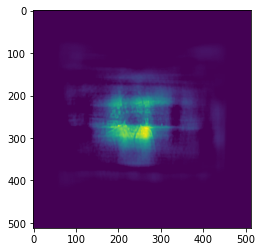

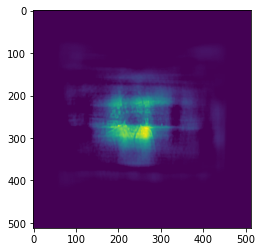

In [489]:
# Let's use this to iterate to a solution:
fig = plt.figure()

n_iters = 1000
x_k = np.zeros((2*M, 2*N))
y_k = np.zeros((2*M, 2*N))
mu = 1
tau_tv = 1e-5
for k in range(n_iters):
    y_k = x_k - mu*Ah(A(x_k) - meas)
    x_k = 0.5*tv2d_aniso_haar(y_k, tau_tv) + 0.5*np.maximum(y_k,0)
    if k%100 == 0:
        plt.imshow(x_k)
        drawnow(fig)
x_tv = x_k;

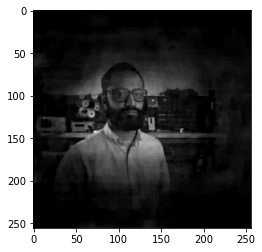

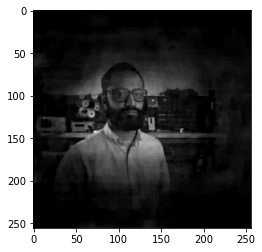

In [565]:
# Fista
fig = plt.figure()
t_k = 1
x_k = np.zeros((2*M, 2*N))
z_k = np.zeros((2*M, 2*N))
y_k = np.zeros((2*M, 2*N))
mu = 1
n_iters = 1000
tau_tv = 1e-5
for k in range(n_iters):
    t_kp = (1+np.sqrt(1+4*t_k**2))/2;
    beta = (t_k-1)/t_kp;
    
    z_k = y_k - mu*Ah(A(y_k) - meas)
    x_kp = 0.5*tv2d_aniso_haar(z_k, tau_tv) + 0.5*np.maximum(z_k,0)
    y_k = x_kp + beta*(x_kp - x_k)

    x_k = x_kp
    t_k = t_kp
    
    if k%200 == 0:
        plt.imshow(crop(y_k),cmap='gray')
        drawnow(fig)

x_fista = y_k       

In [1]:
# Fista
fig = plt.figure()
t_k = 1
x_k = np.zeros((2*M, 2*N))
z_k = np.zeros((2*M, 2*N))
y_k = np.zeros((2*M, 2*N))
mu = 1
n_iters = 1000
tau_tv = 1e-5
for k in range(n_iters):
    t_kp = (1+np.sqrt(1+4*t_k**2))/2;
    beta = (t_k-1)/t_kp;
    
    z_k = y_k - mu*Ah(A(y_k) - meas)
    x_kp = 0.5*tv2d_aniso_haar(z_k, tau_tv) + 0.5*np.maximum(z_k,0)
    y_k = x_kp + beta*(x_kp - x_k)

    x_k = x_kp
    t_k = t_kp
    
    if k%200 == 0:
        plt.imshow(crop(y_k),cmap='gray')
        drawnow(fig)

x_fista = y_k 

NameError: name 'plt' is not defined

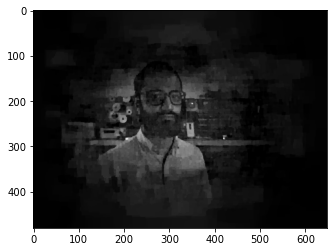

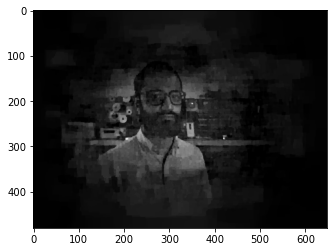

In [806]:
# Fista
fig = plt.figure()
t_k = 1
x_k = np.zeros((2*M, 2*N))
z_k = np.zeros((2*M, 2*N))
y_k = np.zeros((2*M, 2*N))
mu = 1
n_iters = 1000
tau_k = np.logspace(-3,-5.5,n_iters)
#tau_k = np.linspace(1e-4,1e-6,n_iters)
for k in range(n_iters):
    t_kp = (1+np.sqrt(1+4*t_k**2))/2;
    beta = (t_k-1)/t_kp;
    z_k = y_k - mu*Ah(A(y_k) - meas)
    x_kp = 0.5*tv2d_aniso_haar(z_k, tau_k[k]) + 0.5*np.maximum(z_k,0)
    y_k = x_kp + beta*(x_kp - x_k)
    x_k = x_kp
    t_k = t_kp
    if k%100 == 0:
        plt.imshow((y_k),cmap='gray')
        drawnow(fig)
    
x_opt = y_k

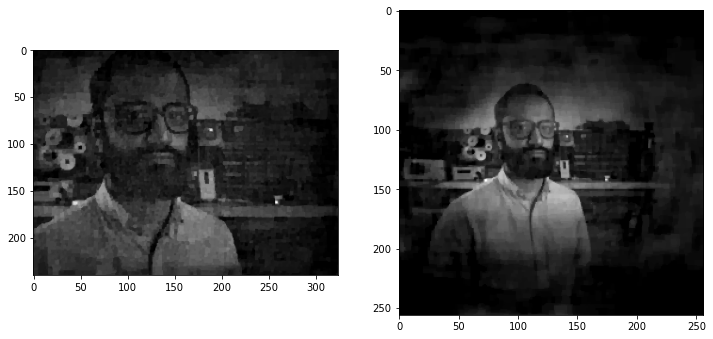

In [807]:
fig,ax = plt.subplots(1,2,figsize=(12,24))
x_opt = x_opt/np.max(x_opt)
x_fista = x_fista/np.max(x_fista)
ax[0].imshow(np.real(crop(x_opt+0*1j)**(1/1.0)),vmax=1,cmap='gray')
#ax[1].imshow(crop(scene)+.01*np.random.randn(np.shape(img)[0]//2, np.shape(img)[1]//2),vmax=1,cmap='gray')
ax[1].imshow(np.real(crop(x_fista+0*1j)**(1/1.2)),vmax=1,cmap='gray')

KeyboardInterrupt: 

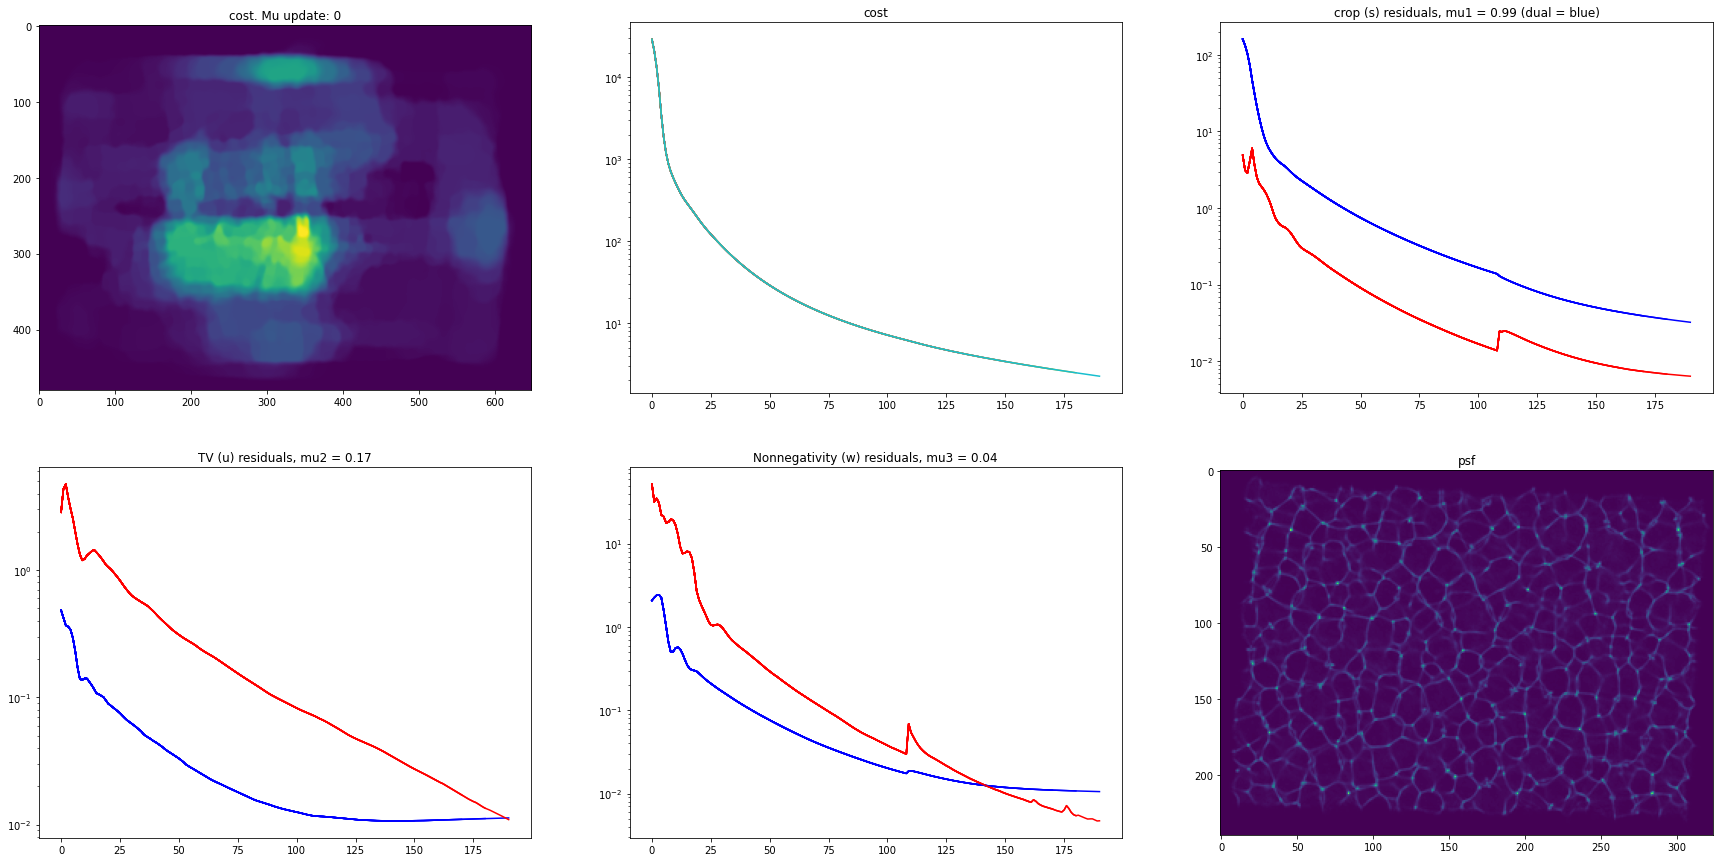

In [812]:
n_iters = 200
tau_ka = np.logspace(-2,-4,n_iters)
options_manual = lensless.gen_options(disp_interval = 10,
                                      fig_size = (30,15),
                                      resid_tol = 10,
                                      mu_inc = 1.,
                                      mu_dec = 1.5,
                                      mu1 = 7.5,
                                      mu2 = .17,
                                      mu3 = .04)
x_admm = lensless.admm2d(meas, psf, tau_ka, n_iters, options=options_manual)

# The last arguments options=lensless.gen_options can be ommitted and you'll get default behavior. In the example above I'm setting the display interval if you want to watch it converge. 



Text(0.5, 1.0, 'Reconstructed')

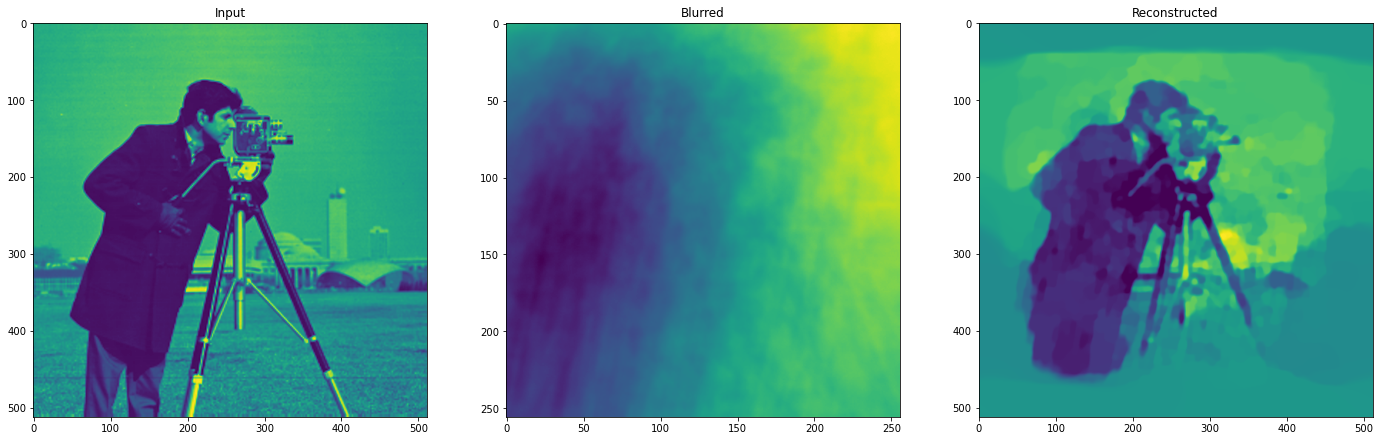

In [291]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(img)
ax[0].set_title('Input')
ax[1].imshow(meas)
ax[1].set_title('Blurred')
# ax[2].imshow(lensless.crop_func(reconned_test, np.shape(kernel)))
ax[2].imshow(reconned_test)
ax[2].set_title('Reconstructed')

The forward model is a convolution, which arises by assuming the system is shift invariant. However, unlike conventional cameras, the large size of a lensless impulse response (aka "point spread function" or PSF) requires that boundary conditions be carefully considered. An often confusing consequence of this of this is that it extends the FoV of the system as compared to a normal lens. To solve for the extended FoV, we solve for an object that is twice the size of the sensor. Intuitively, each pixel on the sensor maps to many pixels in the world, extending the FoV. 

is If we assume the sensor grid is $M\times N$ pixels, then what we do is solve for the object, $x$, on a grid that is $2M \times 2N$. The forward model is then $CF^{-1} \mbox{diag}(FPh) Fv$ where $Px$ zero pads the signal $x$ to twice its size in each dimension, and $Cx$ crops the center 50% of a signal. Note that $P$ and $C$ are adjoints: $P^\intercal = C$. The gradient of l2 loss using this model is then $A^\intercal (Av - b)$ where $A^\intercal = F^{-1}\mbox{diag}((FPh)^*)FP$

Note that if we start with $v$ on a $M\times N$ grid then pad it, the forward model will be $CF^{-1} \mbox{diag}(FPh) FPv$, and the adjoint will be $A^\intercal = CF^{-1}\mbox{diag}((FPh)^*)FP$. This means the gradient will only exist for the central region of the scene, ignoring outer regions that contribute to our measurement due to the large PSF size. This will have the consequence of forcing the edges to zero, rather than letting their values evolve so as to best match our observations. This causes artifacts in the center of the FoV.



In [ ]:
test = np.pad(psf,[(M//2,M//2), (N//2,N//2)],'constant')
np.shape(test)

In [ ]:
# Forward model

# Math vs code

# Math

# Code versus math

In [ ]:
# Why not a Wiener filter?

In [ ]:
# Gradient descent

# Derive the adjoint

# Actual implementation


In [ ]:
# Proximal gradient descent: nonnegativity

In [ ]:
# Priors and denoisers (total variation using cycle spinning)

# Math: total variation as a prior

# TV denoising 

In [ ]:
# Compressed sensing example: pixel erasure

In [ ]:
# 

In [ ]:
# Blur and add noise
kernel_padded = lensless.pad_func(kernel,0.5)
kernel_spectrum = np.fft.fft2(np.fft.ifftshift(kernel_padded));
y = lensless.crop_func(lensless.fftconv(img, kernel_spectrum), np.shape(kernel)) + .001*np.random.randn(np.shape(img)[0]//2, np.shape(img)[1]//2)


In [ ]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(kernel)
ax[0].set_title('PSF')
ax[1].imshow(img)
ax[1].set_title('input image')
ax[2].imshow(y)
ax[2].set_title('simulated measurement')

In [ ]:
# Frequency space division
Y = np.fft.fft2(lensless.pad_func(y,0.5))
x_wiener = np.fft.ifft2(Y/kernel_spectrum)
plt.imshow(np.real(x_wiener))

In [ ]:
# Gradient descent
A = lambda x:lensless.crop_func(lensless.fftconv(x, kernel_spectrum), np.shape(kernel))
A_adj = lambda y:lensless.fftconv(lensless.pad_func(

test = A_adj(A(img))

In [ ]:


# Reconstruct
options_manual = lensless.gen_options(disp_interval = 50,
                                      fig_size = (30,15),
                                      resid_tol = 1.5,
                                      mu_inc = 1.005,
                                      mu_dec = 1.2,
                                      mu1 = .03,
                                      mu2 = .01, 
                                      mu3 = .001)
reconned_test = lensless.admm2d(meas, psf, .006, 1000, options=options_manual)

# The last arguments options=lensless.gen_options can be ommitted and you'll get default behavior. In the example above I'm setting the display interval if you want to watch it converge. 

fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(img)
ax[0].set_title('Input')
ax[1].imshow(y)
ax[1].set_title('Blurred')
# ax[2].imshow(lensless.crop_func(reconned_test, np.shape(kernel)))
ax[2].imshow(reconned_test)
ax[2].set_title('Reconstructed')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, color
from skimage.util import random_noise


original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1].imshow(denoise_wavelet(noisy, multichannel=True))
